In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [40]:
data_train = pd.read_csv('D:/PGDBA/Competitions/AVL&T/train.csv',parse_dates=['application_date'],index_col='application_date')
data_test = pd.read_csv('D:/PGDBA/Competitions/AVL&T/test.csv',parse_dates=['application_date'],index_col='application_date')

In [41]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80402 entries, 2017-04-01 to 2019-07-23
Data columns (total 5 columns):
segment       80402 non-null int64
branch_id     66898 non-null float64
state         80402 non-null object
zone          66898 non-null object
case_count    80402 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.7+ MB


In [26]:
from sklearn.preprocessing import LabelEncoder
labelEnc = LabelEncoder()

In [42]:
data_train.application_date = pd.to_datetime(data_train.application_date)

AttributeError: 'DataFrame' object has no attribute 'application_date'

In [28]:
data_train['zone'] = labelEnc.fit_transform(data_train['zone'].astype(str))
data_train['state'] = labelEnc.fit_transform(data_train['state'].astype(str))
#data_train['application_day'] = labelEnc.fit_transform(data_train['application_day'].astype(str))

In [29]:
data_train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,19,1,40.0
1,2017-04-03,1,1.0,19,1,5.0
2,2017-04-04,1,1.0,19,1,4.0
3,2017-04-05,1,1.0,19,1,113.0
4,2017-04-07,1,1.0,19,1,76.0


In [30]:
data_train.isnull().sum()

application_date        0
segment                 0
branch_id           13504
state                   0
zone                    0
case_count              0
dtype: int64

In [45]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80402 entries, 2017-04-01 to 2019-07-23
Data columns (total 5 columns):
segment       80402 non-null int64
branch_id     66898 non-null float64
state         80402 non-null object
zone          66898 non-null object
case_count    80402 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.7+ MB


In [32]:
states = set(data_train.state)
statelist = list(states)
#statelist

In [33]:
import csv
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import psycopg2
import pyramid
import random
import seaborn as sns
import statsmodels.tsa.stattools as ts
from pmdarima import auto_arima
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Bhushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

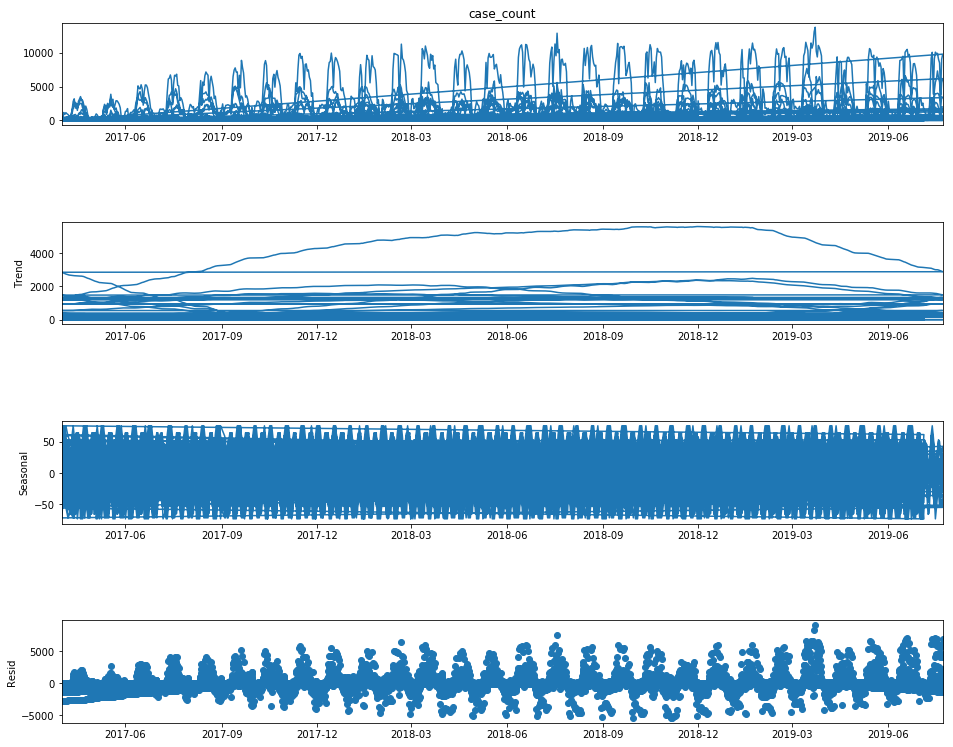

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(data_train['case_count'], model='additive', freq=365)
result = seasonal_decompose(data_train.case_count.dropna(),freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [79]:
tr_start,tr_end = '2017-04-01','2018-12-31'
te_start,te_end = '2019-01-01','2019-07-23'
#size = int(len(data_train) * 0.66)
#train, test = X[0:size], X[size:len(data_train)]
tra = data_train['case_count'][tr_start:tr_end].dropna()
tes = data_train['case_count'][te_start:te_end].dropna()
#tra = data_train['case_count'][0:size].dropna()
#tes = data_train['case_count'][size:len(data_train)].dropna()

In [53]:
#https://www.kaggle.com/poiupoiu/how-to-use-sarimax

In [48]:
res = sm.tsa.adfuller(data_train['case_count'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:3.4595212112839036e-07


In [49]:
res = sm.tsa.adfuller(data_train['case_count'].dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:2.9229317940344843e-07


In [50]:
res = sm.tsa.adfuller(data_train['case_count'].dropna(),regression='nc')
print('p-value:{}'.format(res[1]))

p-value:6.882266461241785e-08


In [51]:
res = sm.tsa.adfuller(data_train['case_count'].dropna(),regression='ctt')
print('p-value:{}'.format(res[1]))

p-value:8.366768816809567e-08


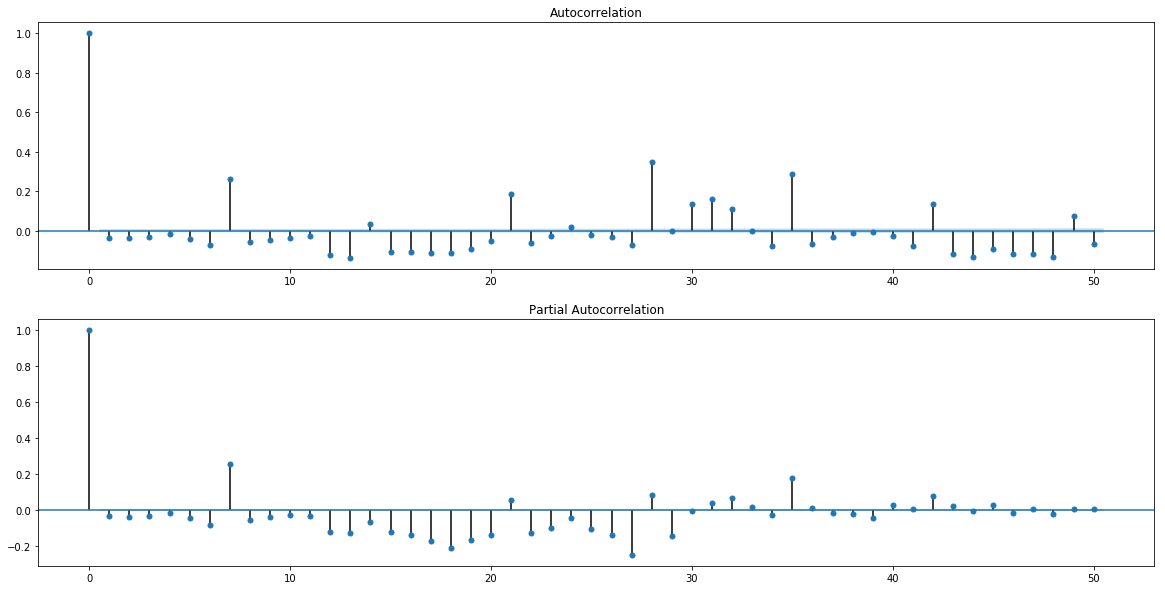

In [56]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [72]:
resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=7, max_ma=7, ic='aic', trend='nc')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (7, 0) is the best.


In [62]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(7,1,0),seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

C:\Users\Bhushan\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Bhushan\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\Bhushan\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Bhushan\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not mon

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             case_count   No. Observations:                61700
Model:               SARIMAX(7, 1, 0)   Log Likelihood             -421122.684
Date:                Thu, 23 Jan 2020   AIC                         842261.368
Time:                        10:38:22   BIC                         842333.608
Sample:                             0   HQIC                        842283.778
                              - 61700                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0231      0.001    -45.228      0.000      -0.024      -0.022
ar.L2         -0.0292      0.001    -44.702      0.000      -0.031      -0.028
ar.L3         -0.0349      0.001    -56.769      0.000      -0.036      -0.034
ar.L4         -0.0136      0.001    -19.242      0.000      -0.015      -0.012
ar.L5         -0.0382      0.001    -56.424      0.000      -0.040      -0.037
ar.L6         -0.0695      0.001   -124.897      0.000      -0.071      -0.068
ar.L7          0.2545      0.001    387.503      0.000       0.253       0.256
sigma2      4.974e+04     32.315   1539.219      0.000    4.97e+04    4.98e+04
===================================================================================
Ljung-Box (Q):                    21559.03   Jarque-Bera (JB):          65630301.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              18.99   Skew:                             1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                       162.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

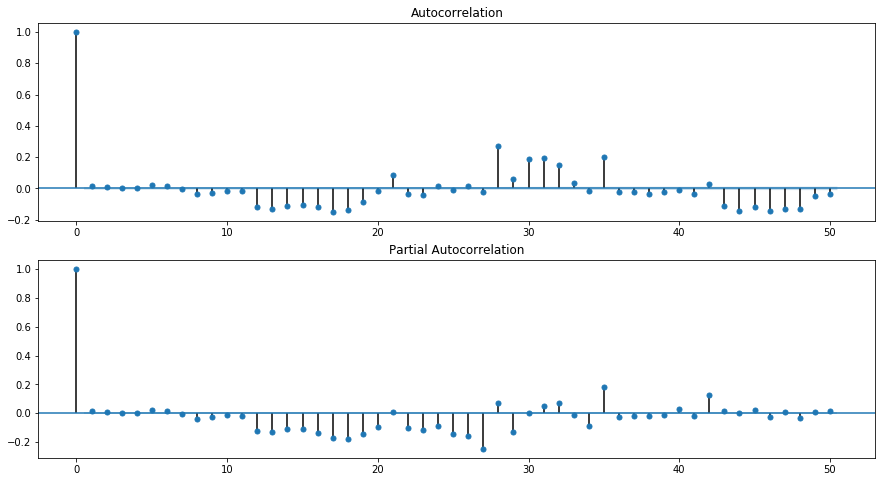

In [63]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error
pred = arima.forecast(len(data_train)-len(tra))
print('ARIMA model MSE:{}'.format(mean_squared_error(tes,pred)))

C:\Users\Bhushan\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ARIMA model MSE:915614.0701333784


In [87]:
pred

61700    -74.349172
61701     50.321129
61702     86.461136
61703    -81.443773
61704   -112.654814
61705   -138.817163
61706   -144.355148
61707   -178.982136
61708   -141.046231
61709   -118.307890
61710   -158.220770
61711   -164.729003
61712   -169.669181
61713   -168.736898
61714   -180.161992
61715   -170.063502
61716   -161.120219
61717   -170.752684
61718   -172.337128
61719   -173.353002
61720   -172.424162
61721   -176.180923
61722   -173.747252
61723   -170.706593
61724   -173.032056
61725   -173.469186
61726   -173.709566
61727   -173.247189
61728   -174.445412
61729   -173.919868
            ...    
80372   -173.674369
80373   -173.674369
80374   -173.674369
80375   -173.674369
80376   -173.674369
80377   -173.674369
80378   -173.674369
80379   -173.674369
80380   -173.674369
80381   -173.674369
80382   -173.674369
80383   -173.674369
80384   -173.674369
80385   -173.674369
80386   -173.674369
80387   -173.674369
80388   -173.674369
80389   -173.674369
80390   -173.674369
